In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pymarket import Market
from pymarket.bids.demand_curves import demand_curve_from_bids, supply_curve_from_bids
from pymarket.plot import plot_demand_curves

In [2]:
## Create a Market instance and add bids to it

In [3]:
mar = Market()

# Quantity, Price, UserId, isBuying, Divisible
mar.accept_bid(1, 4, 0, True, 0)
mar.accept_bid(1, 3, 1, True, 0)
mar.accept_bid(1, 2, 2, True, 0)
mar.accept_bid(1, 1, 3, True, 0)
mar.accept_bid(1, 1, 10, False, 0)
mar.accept_bid(1, 2, 11, False, 0)
mar.accept_bid(1, 3, 12, False, 0)

bids = mar.bm.get_df()

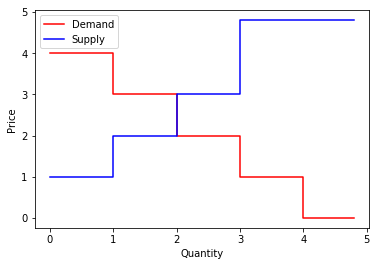

In [4]:
mar.plot()

In [27]:
bids

,quantity,price,user,buying,time,divisible
0,1,4,0,True,0,True
1,1,3,1,True,0,True
2,1,2,2,True,0,True
3,1,1,3,True,0,True
4,1,1,10,False,0,True
5,1,2,11,False,0,True
6,1,3,12,False,0,True


# Huang et.al Auction

* The price setters do not trade
* There is a different price for buying and selling

In [5]:
transactions, extras, statistics = mar.run('huang')

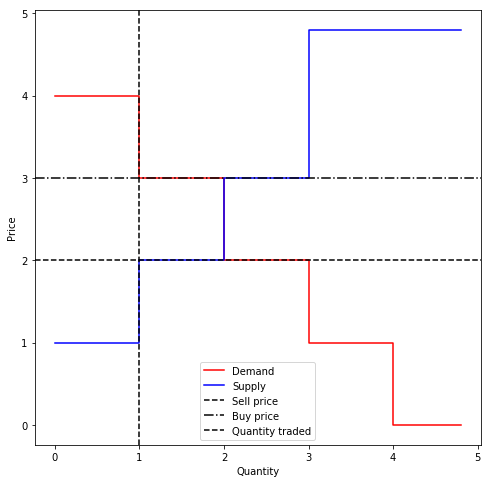

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_demand_curves(bids, ax=ax)
ax.axhline(extras['price_sell'], linestyle='--', c='k', label='Sell price')
ax.axhline(extras['price_buy'], linestyle='-.',  c='k', label='Buy price')
ax.axvline(extras['quantity_traded'], linestyle='--', c='k', label='Quantity traded')
ax.legend()

## Results

* Only bids 0 (user = 0) and 4 (user = 10) trade: 1 unit each

In [7]:
transactions.get_df()

,bid,quantity,price,source,active
0,4,1.0,2.0,-1,False
1,0,1.0,3.0,-1,False


## Statistics

In [8]:
print(f'% of the traded volume  versus  optimal  is: {statistics["percentage_traded"]:0.2f}')
print(f'% of the maximum social welafre achieved is: {statistics["percentage_welfare"]:0.2f}')

% of the traded volume  versus  optimal  is: 0.33
% of the maximum social welafre achieved is: 0.50


# MUDA

* Players are split into two groups and they trade with the price of the other
* The split is random and guarantees strategyproofness
* There is a unique price for buying and selling

In [9]:
r = np.random.RandomState(1234)
transactions, extras, statistics = mar.run('muda', r=r)

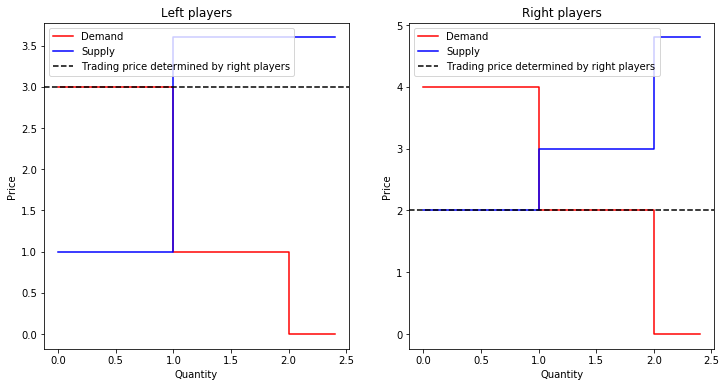

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_demand_curves(bids[bids.index.isin(extras['left'])], ax=ax[0])
ax[0].axhline(extras['price_right'], linestyle='--', c='k', label='Trading price determined by right players')
ax[0].legend()
ax[0].set_title('Left players')

plot_demand_curves(bids[bids.index.isin(extras['right'])], ax=ax[1])
ax[1].axhline(extras['price_left'], linestyle='--', c='k', label='Trading price determined by right players')
ax[1].legend()
_ = ax[1].set_title('Right players')

## Results

**On the left side**
* bids 4 (user = 10) and 1 (user = 1) trade: 1 unit each at price 3

**On the right side**
* bids 5 (user = 11) and 0 (user = 0) trade: 1 unit each at price 2

In [28]:
transactions.get_df()

,bid,quantity,price,source,active
0,4,1,3.0,-1,False
1,1,1,3.0,-1,False
2,5,1,2.0,-1,False
3,0,1,2.0,-1,False


In [29]:
print(f'% of the traded volume  versus  optimal  is: {statistics["percentage_traded"]:0.2f}')
print(f'% of the maximum social welafre achieved is: {statistics["percentage_welfare"]:0.2f}')

% of the traded volume  versus  optimal  is: 0.67
% of the maximum social welafre achieved is: 1.00
